In [123]:
# Biostat 273 Midterm Kaggle Competition
# Xinyang Li
# UID: 605352032

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# import data

df_train = pd.read_csv('/Users/xinyang_li/Desktop/UCLA/Fall_2020/Biostat 273/exoTrain.csv')
df_test = pd.read_csv('/Users/xinyang_li/Desktop/UCLA/Fall_2020/Biostat 273/exoTest.csv')

In [3]:
df_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
df_test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [5]:
# separate outcomes (Y) and predictors (X) for training and testing sets
X_train = df_train.drop("LABEL", axis = 1)
Y_train = df_train.LABEL
X_test = df_test.drop("LABEL", axis = 1)
Y_test = df_test.LABEL

In [13]:
# First method: SVM (Support Vector Machine)

In [62]:
from sklearn import svm
svm_model = svm.SVC(kernel = 'poly', probability = True)
svm_model.fit(X_train, Y_train)
y_pred_svm = svm_model.predict(X_test)

In [63]:
accuracy_svm = metrics.accuracy_score(Y_test, y_pred_svm)
print("The accuracy score for Decision Tree test set is", accuracy_svm)

The accuracy score for SVM test set is 0.9912280701754386


In [64]:
y_pred_train = svm_model.predict(X_train)
accuracy_svm_train = metrics.accuracy_score(Y_train, y_pred_train)
print("The accuracy socre for Decision Tree training set is", accuracy_svm_train)

The accuracy socre for SVM training set is 0.992923137409082


In [18]:
# We can see that the accuracy score for training and test sets have very little difference. 
# It is a good sign. However, we have to check the confusion matrix to see if it is overfitting.

In [65]:
# confusion matrix
cfm_svm = metrics.confusion_matrix(Y_test, y_pred_svm)
cfm_svm

array([[565,   0],
       [  5,   0]])

Text(0.5, 1, 'Confusion matrix of SVM')

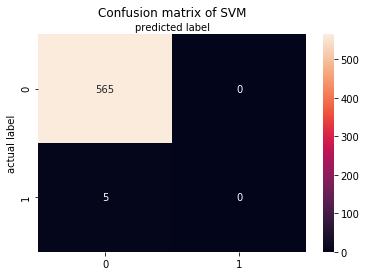

In [20]:
# Confusion Matrix Vasualization
class_labels = [1,2]
fig, ax = plt.subplots()
marks = np.arange(len(class_labels))
plt.xticks(marks, class_labels)
plt.yticks(marks, class_labels)


sns.heatmap(pd.DataFrame(cfm_svm), annot=True, fmt = "g")
ax.xaxis.set_label_position("top")
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('Confusion matrix of SVM', y=1)

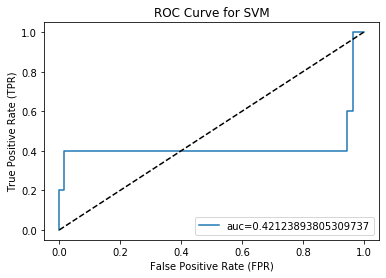

In [21]:
y_pred_proba = svm_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba, pos_label = 2)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for SVM")
plt.legend(loc=4)
plt.show()

In [22]:
# From the ROC curve and confusion matrix heatmap, we can see that the model is highly overfitting and
# there is bugs because the auc score is less than 0.5. 
# Therefore the SVM model I fitted above did a bad prediction.
# I assume the error may be from the dataset. We need to resample the dataset since the data is too imbalanced.

In [111]:
# use the oversampling technique to re-sample the datasets 
# in order to handle the imbalance

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors = 2)
X_new, Y_new = smote.fit_resample(X_train, Y_train)
X_smote_test, Y_smote_test = smote.fit_resample(X_test, Y_test)

In [107]:
Y_smote.shape # the sample size enlarged

(10100,)

In [ ]:
# Here, I re-do the SVM model using the new datasets.
# However, since the dataset was enlarged, the process time takes really long and 
# the result I got did not get better. i.e, I got all non-exoplanet stars from the result.
# Therefore I conclude that the SVM got really high accuracy but it is highly overfitting.

# Now I tried to use the decision tree to fit the new model. 

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_smote, X_smote_test, Y_smote, Y_smote_test = train_test_split(X_new, Y_new, test_size=0.1, random_state=50)

model_dt = DecisionTreeClassifier(max_depth=3, random_state=20)
model_dt.fit(X_smote, Y_smote)
pred_dt = model_dt.predict(X_smote_test)
acc_dt = metrics.accuracy_score(pred_dt,Y_smote_test)
print("The accuracy score for DT test set is", acc_dt)

The accuracy score for DT test set is 0.8881188118811881


In [121]:
pred_dt_train = model_dt.predict(X_smote)
acc_dt_train = metrics.accuracy_score(pred_dt_train,Y_smote)
print("The accuracy score for DT training set is", acc_dt_train)

The accuracy score for DT training set is 0.8888888888888888


In [ ]:
# From the two accuracy score, we can see the difference between test and training set is very small.
# To check overfitting further, I plot the confusion matrix and the ROC curve below.

Text(0.5, 1, 'Confusion matrix of Decision Tree')

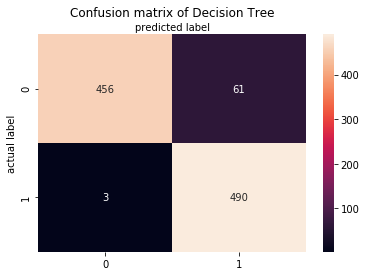

In [114]:
# confusion matrix and its visualization
cfm_dt = metrics.confusion_matrix(Y_smote_test, pred_dt)

class_labels = [1,2]
fig, ax = plt.subplots()
marks = np.arange(len(class_labels))
plt.xticks(marks, class_labels)
plt.yticks(marks, class_labels)
sns.heatmap(pd.DataFrame(cfm_dt), annot=True, fmt = "g")
ax.xaxis.set_label_position("top")
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('Confusion matrix of Decision Tree', y=1)

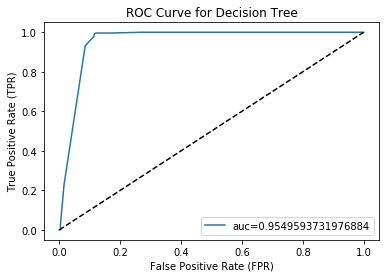

In [115]:
y_pred_proba = model_dt.predict_proba(X_smote_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_smote_test, y_pred_proba, pos_label = 2)
auc = metrics.roc_auc_score(Y_smote_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Decision Tree")
plt.legend(loc=4)
plt.show()

In [ ]:
# From the confusion matrix and the ROC curve above, we can see that the result from a decision tree
# got very high accuracy and avoid overfitting since the auc score is nearly 1. 
# I also tried NN method for this project, however, like SVM, the NN method gave all non-exoplanet results.
# I am not sure which part I did wrong but I did try many different parameters and they all did not work.

# I really found the dataset to be super imbalanced, given that exoplanet stars are rare. From my research,
# we can deal with imbalanced data using resampling techniques - including undersampling and oversampling.
# Here, I use the oversampling method since the number of rows of label = 2 is really small. So undersampling will
# casue the dataset to be very small, too, which is not good for prediction.

# In the end, I got the accuracy about 89% (for the test set only) using decision tree. 